In [1]:
from goes2go.data import goes_latest, goes_timerange, goes_nearesttime

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime as dt
import xarray as xr
import glob
from PIL import Image
import requests
from rich import print, print_json

In [19]:
def make_gif(list_of_images):
    frames = [Image.open(image).convert("RGBA") for image in list_of_pngs]
    frame_one = frames[0]
    frame_one.save("test.gif", format="GIF", append_images=frames,
               save_all=True, duration=120, loop=0, optimize=True)

In [3]:
def make_centered_extent(lon, lat, width, height, offset=(0,0)):
    x_min = lon - (width / 2) + offset[0]
    x_max = lon + (width / 2) + offset[0]
    y_min = lat - (height / 2) + offset[1]
    y_max = lat + (height / 2) + offset[1]
    return (x_min, x_max, y_min, y_max)

In [4]:
def get_storm_info():
    url = "https://www.nhc.noaa.gov/CurrentStorms.json"
    resp = requests.get(url)
    return resp.json()

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/home/vscode/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

144

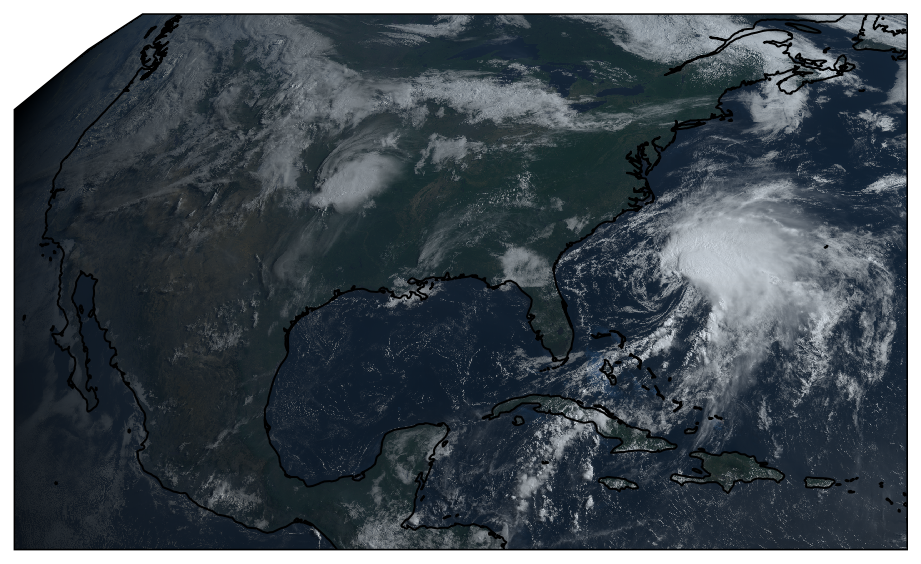

In [5]:
# Download a GOES ABI dataset
G = goes_latest(product='ABI')

# Make figure on Cartopy axes
fig = plt.figure(figsize=(8,6), dpi=144)
ax = plt.subplot(projection=G.rgb.crs )
ax.imshow(G.rgb.NaturalColor(), **G.rgb.imshow_kwargs)
#ax.set_extent((-105, -85, 30, 47))

ax.coastlines()
print(fig.dpi)

In [6]:
end = dt.datetime.utcnow()
start = end - dt.timedelta(minutes=120)
save_dir = "/tmp"

g = goes_timerange(start, end,
                   satellite='goes16',
                   product='ABI',
                   save_dir=save_dir,
                   return_as='filelist')

g

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [24] files to [/tmp/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

,file,start,end,creation
0,noaa-goes16/ABI-L2-MCMIPC/2022/156/11/OR_ABI-L...,2022-06-05 11:26:17.700,2022-06-05 11:28:55.600,2022-06-05 11:29:05.200
1,noaa-goes16/ABI-L2-MCMIPC/2022/156/11/OR_ABI-L...,2022-06-05 11:31:17.700,2022-06-05 11:33:55.000,2022-06-05 11:34:05.300
2,noaa-goes16/ABI-L2-MCMIPC/2022/156/11/OR_ABI-L...,2022-06-05 11:36:17.700,2022-06-05 11:38:55.500,2022-06-05 11:39:05.000
3,noaa-goes16/ABI-L2-MCMIPC/2022/156/11/OR_ABI-L...,2022-06-05 11:41:17.700,2022-06-05 11:43:55.600,2022-06-05 11:44:05.300
4,noaa-goes16/ABI-L2-MCMIPC/2022/156/11/OR_ABI-L...,2022-06-05 11:46:17.700,2022-06-05 11:48:55.000,2022-06-05 11:49:05.200
5,noaa-goes16/ABI-L2-MCMIPC/2022/156/11/OR_ABI-L...,2022-06-05 11:51:17.700,2022-06-05 11:53:55.600,2022-06-05 11:54:05.700
6,noaa-goes16/ABI-L2-MCMIPC/2022/156/11/OR_ABI-L...,2022-06-05 11:56:17.700,2022-06-05 11:58:55.600,2022-06-05 11:59:04.900
7,noaa-goes16/ABI-L2-MCMIPC/2022/156/12/OR_ABI-L...,2022-06-05 12:01:17.700,2022-06-05 12:03:56.200,2022-06-05 12:04:05.100
8,noaa-goes16/ABI-L2-MCMIPC/2022/156/12/OR_ABI-L...,2022-06-05 12:06:17.700,2022-06-05 12:08:55.000,2022-06-05 12:09:05.000
9,noaa-goes16/ABI-L2-MCMIPC/2022/156/12/OR_ABI-L...,2022-06-05 12:11:17.700,2022-06-05 12:13:56.100,2022-06-05 12:14:05.500


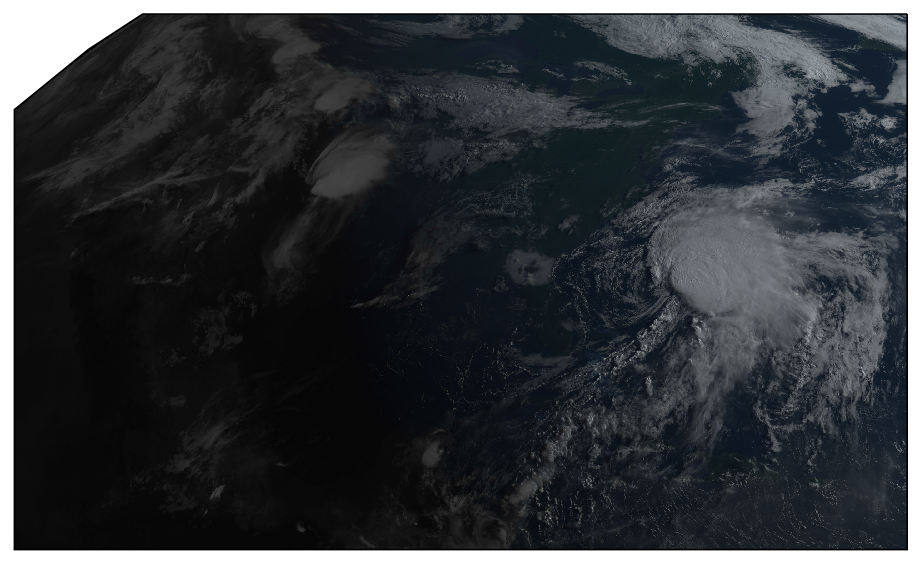

In [7]:
product = xr.open_dataset(f"{save_dir}/{g.iloc[0].file}")

fig = plt.figure(figsize=(8,6), dpi=144)
ax = fig.add_subplot(1,1,1, projection=product.rgb.crs )
ax.imshow(product.rgb.NaturalColor(night_IR=True), **product.rgb.imshow_kwargs)
#ax.coastlines()
#ax.set_extent(make_centered_extent(lon=storm_coords[0], lat=storm_coords[1], width=8, height=8, offset=(3, 1)))


In [9]:

storm_info = get_storm_info()['activeStorms'][0]
storm_coords = (storm_info['longitudeNumeric'], storm_info['latitudeNumeric'])
print(f"{storm_coords = }")
last_update = dt.datetime.strptime(storm_info['lastUpdate'], "%Y-%m-%dT%H:%M:%S.%fZ")
print(f"{last_update = }")
print(f"{dt.datetime.utcnow().isoformat()}")

storm_coords = (-74.7, 30.0)

last_update = datetime.datetime(2022, 6, 5, 12, 45)

2022-06-05T13:26:39.546741

In [13]:
list_of_pngs = []

for index, row in g.iterrows():
    fig = plt.figure(figsize=(8,6), dpi=144)
    nc_file = row.file
    product = xr.open_dataset(f"{save_dir}/{nc_file}")
    ax = plt.subplot(projection=product.rgb.crs )
    ax.imshow(product.rgb.NaturalColor(night_IR=False), **product.rgb.imshow_kwargs)
    #ax.coastlines()
    ax.set_extent(make_centered_extent(lon=storm_coords[0], lat=storm_coords[1], width=12, height=8))
    png_file_name = f"test{index}.png"
    plt.savefig(png_file_name, format="png")
    list_of_pngs.append(png_file_name)
    plt.close()
    del(fig)
    del(ax)

In [20]:
make_gif(list_of_images=list_of_pngs)

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: ABI-L2-MCMIPC    |
 |    Domain: C                |
📦 Finished downloading [1] files to [/home/vscode/data/noaa-goes16/ABI-L2-MCMIPC].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

144

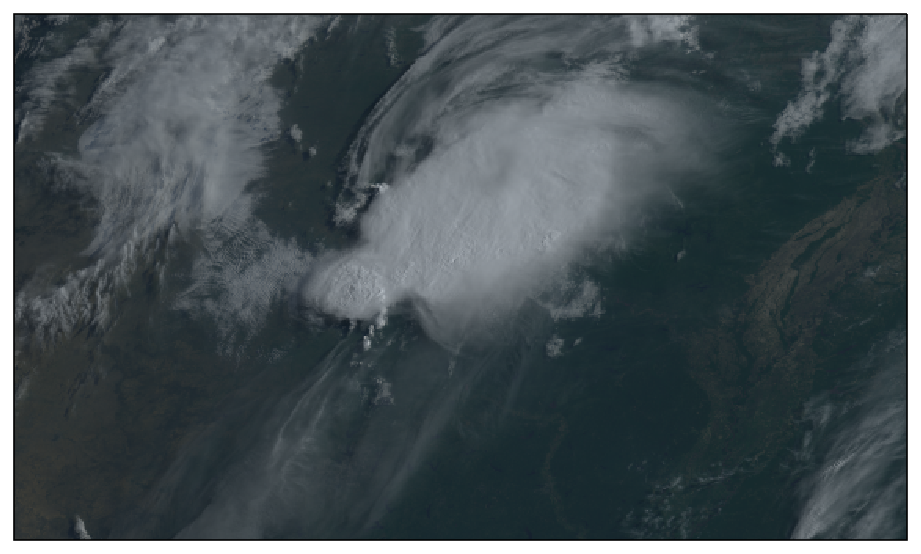

In [23]:
G = goes_nearesttime(attime=dt.datetime.utcnow(),
                     satellite='goes16',
                     product='ABI',
                     return_as='xarray')

# Make figure on Cartopy axes
fig = plt.figure(figsize=(8,6), dpi=144)
ax = plt.subplot(projection=G.rgb.crs )
ax.imshow(G.rgb.NaturalColor(), **G.rgb.imshow_kwargs)
ax.set_extent(make_centered_extent(lon=-96, lat=36, width=12, height=8, offset=(0,0)))

ax.coastlines()
print(fig.dpi)

In [21]:
print(get_storm_info())

{
    'activeStorms': [
        {
            'id': 'al012022',
            'binNumber': 'AT1',
            'name': 'Alex',
            'classification': 'TS',
            'intensity': '50',
            'pressure': '993',
            'latitude': '30.0N',
            'longitude': '74.7W',
            'latitudeNumeric': 30.0,
            'longitudeNumeric': -74.7,
            'movementDir': 55,
            'movementSpeed': 22,
            'lastUpdate': '2022-06-05T12:45:00.000Z',
            'publicAdvisory': {
                'advNum': '011A',
                'issuance': '2022-06-05T12:00:00.000Z',
                'url': 'https://www.nhc.noaa.gov/text/MIATCPAT1.shtml'
            },
            'forecastAdvisory': {
                'advNum': '011',
                'issuance': '2022-06-05T09:00:00.000Z',
                'url': 'https://www.nhc.noaa.gov/text/MIATCMAT1.shtml'
            },
            'windSpeedProbabilities': {
                'advNum': '011',
                'issuance': '2022-06-05T09:00:00.000Z',
                'url': 'https://www.nhc.noaa.gov/text/MIAPWSAT1.shtml'
            },
            'forecastDiscussion': {
                'advNum': '011',
                'issuance': '2022-06-05T09:00:00.000Z',
                'url': 'https://www.nhc.noaa.gov/text/MIATCDAT1.shtml'
            },
            'forecastGraphics': {
                'advNum': '011A',
                'issuance': '2022-06-05T12:00:00.000Z',
                'url': 'https://www.nhc.noaa.gov/graphics_at1.shtml'
            },
            'forecastTrack': {
                'advNum': '011A',
                'issuance': '2022-06-05T12:00:00.000Z',
                'zipFile': 
'https://www.nhc.noaa.gov/gis/forecast/archive/al012022_5day_011A.zip',
                'kmzFile': 
'https://www.nhc.noaa.gov/storm_graphics/api/AL012022_011Aadv_TRACK.kmz'
            },
            'windWatchesWarnings': {
                'advNum': '011A',
                'issuance': '2022-06-05T12:00:00.000Z',
                'zipFile': 
'https://www.nhc.noaa.gov/gis/forecast/archive/al012022_5day_011A.zip',
                'kmzFile': 
'https://www.nhc.noaa.gov/storm_graphics/api/AL012022_011Aadv_WW.kmz'
            },
            'trackCone': {
                'advNum': '011A',
                'issuance': '2022-06-05T12:00:00.000Z',
                'zipFile': 
'https://www.nhc.noaa.gov/gis/forecast/archive/al012022_5day_011A.zip',
                'kmzFile': 
'https://www.nhc.noaa.gov/storm_graphics/api/AL012022_011Aadv_CONE.kmz'
            },
            'initialWindExtent': {
                'advNum': '011A',
                'issuance': '2022-06-05T12:00:00.000Z',
                'zipFile': 
'https://www.nhc.noaa.gov/gis/forecast/archive/al012022_fcst_011A.zip',
                'kmzFile': 
'https://www.nhc.noaa.gov/storm_graphics/api/AL012022_initialradii_011Aadv.kmz'
            },
            'forecastWindRadiiGIS': {
                'advNum': '011A',
                'issuance': '2022-06-05T12:00:00.000Z',
                'zipFile': 
'https://www.nhc.noaa.gov/gis/forecast/archive/al012022_fcst_011A.zip',
                'kmzFile': 
'https://www.nhc.noaa.gov/storm_graphics/api/AL012022_forecastradii_011Aadv.kmz'
            },
            'bestTrackGIS': {
                'issuance': '2022-06-05T06:00:00.000Z',
                'zipFile': 'https://www.nhc.noaa.gov/gis/best_track/al012022_best_track.zip',
                'kmzFile': 'https://www.nhc.noaa.gov/gis/best_track/al012022_best_track.kmz'
            },
            'earliestArrivalTimeTSWindsGIS': {
                'advNum': '011',
                'issuance': '2022-06-05T09:00:00.000Z',
                'kmzFile': 
'https://www.nhc.noaa.gov/storm_graphics/api/AL012022_011adv_earliest_reasonable_toa_34.kmz'
            },
            'mostLikelyTimeTSWindsGIS': {
                'advNum': '011',
                'issuance': '2022-06-05T09:00:00.000Z',
                'kmzFile': 
'https://www.nhc.noaa.gov/storm_graphi